<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day3_neural_nets_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Can save model as h5 file, saves the input structure

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from keras.metrics import RootMeanSquaredError

# Initialise random seed
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# Load in weather dataset
url = 'https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1'
data = pd.read_csv(url)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
# Define inputs and outputs
nr_rows = 365*3
X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])   # input: time of year

features = ['BASEL_cloud_cover', 'BASEL_humidity',	'BASEL_pressure',
            'BASEL_global_radiation',	'BASEL_precipitation',	'BASEL_sunshine',
            'BASEL_temp_mean',	'BASEL_temp_min', 'BASEL_temp_max']   # grab all features related to Basel.

X_data = X_data[features]

y_data = data.loc[1:(nr_rows + 1)]['BASEL_sunshine']  # output: sunshine index?

In [5]:
X_data.shape, y_data.shape

((1096, 9), (1096,))

In [6]:
X_data

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6
...,...,...,...,...,...,...,...,...,...
1091,7,0.82,1.0020,0.36,0.00,1.0,8.2,6.7,10.4
1092,8,0.90,1.0041,0.10,0.26,0.0,7.3,5.2,9.3
1093,8,0.79,1.0126,0.16,0.17,0.0,7.8,6.1,13.0
1094,8,0.65,1.0077,0.15,0.00,0.0,12.5,9.7,14.7


In [7]:
# Prepare data for training
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X_data, y_data, test_size = 0.3)

X_val, X_test, y_val, y_test = train_test_split(
    X_holdout, y_holdout, test_size = 0.5)

In [8]:
X_holdout

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
997,8,0.94,1.0141,0.21,1.84,0.0,6.3,5.3,7.6
435,8,0.83,1.0135,0.32,1.44,0.0,11.8,9.5,13.8
1030,6,0.63,1.0202,0.41,0.00,1.4,14.1,7.1,21.6
737,6,0.92,1.0320,0.34,0.00,0.3,-4.4,-7.2,-2.3
801,7,0.48,1.0160,1.45,0.00,5.5,12.6,6.4,19.4
...,...,...,...,...,...,...,...,...,...
804,6,0.84,1.0139,1.15,0.00,1.8,8.1,3.9,13.1
1045,6,0.82,1.0108,0.34,0.57,2.4,10.5,6.0,14.4
769,8,0.91,1.0280,0.29,0.58,0.0,4.7,2.7,6.7
985,5,0.78,1.0192,1.38,0.00,5.3,15.2,11.4,21.1


In [9]:
def create_nn():
  inputs = keras.Input(shape = (X_data.shape[1],))
  layers_dense = keras.layers.Dense(100, 'relu')(inputs)
  layers_dense2 = keras.layers.Dense(50, 'relu')(layers_dense)
  outputs = keras.layers.Dense(1)(layers_dense2)
  model = keras.Model(inputs = inputs, outputs = outputs,
                      name = 'weather_base_model')
  return model

model = create_nn()

In [10]:
model.summary()

Model: "weather_base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6101 (23.83 KB)
Trainable params: 6101 (23.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
def compile_model(model):
  model.compile(optimizer = 'adam', loss = 'mse',
                metrics = [keras.metrics.RootMeanSquaredError()]) # note 'mse' is mean squared error, we want to use RMSE

compile_model(model)

In [12]:
# verbose: amount of info provided
# verbose=0 will show you nothing (silent)
# verbose=1 will show you an animated progress bar like this: progres_bar
# verbose=2 will just mention the number of epoch like this

history = model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
24/24 - 1s - loss: 22.6608 - root_mean_squared_error: 4.7603 - 1s/epoch - 60ms/step
Epoch 2/200
24/24 - 0s - loss: 13.9381 - root_mean_squared_error: 3.7334 - 74ms/epoch - 3ms/step
Epoch 3/200
24/24 - 0s - loss: 13.4835 - root_mean_squared_error: 3.6720 - 83ms/epoch - 3ms/step
Epoch 4/200
24/24 - 0s - loss: 13.3760 - root_mean_squared_error: 3.6573 - 74ms/epoch - 3ms/step
Epoch 5/200
24/24 - 0s - loss: 13.3605 - root_mean_squared_error: 3.6552 - 76ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 13.1856 - root_mean_squared_error: 3.6312 - 98ms/epoch - 4ms/step
Epoch 7/200
24/24 - 0s - loss: 13.1157 - root_mean_squared_error: 3.6216 - 67ms/epoch - 3ms/step
Epoch 8/200
24/24 - 0s - loss: 12.9946 - root_mean_squared_error: 3.6048 - 101ms/epoch - 4ms/step
Epoch 9/200
24/24 - 0s - loss: 13.1532 - root_mean_squared_error: 3.6267 - 80ms/epoch - 3ms/step
Epoch 10/200
24/24 - 0s - loss: 12.9671 - root_mean_squared_error: 3.6010 - 67ms/epoch - 3ms/step
Epoch 11/200
24/24 - 0s - los

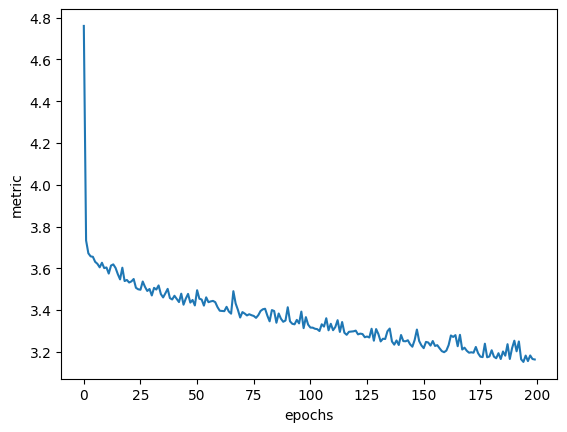

In [13]:
def plot_history(history, metrics):

  history_df = pd.DataFrame.from_dict(history.history)
  sns.lineplot(data=history_df[metrics])
  plt.xlabel("epochs")
  plt.ylabel("metric")

plot_history(history, 'root_mean_squared_error')

6/6 [==============================] - 0s 3ms/step


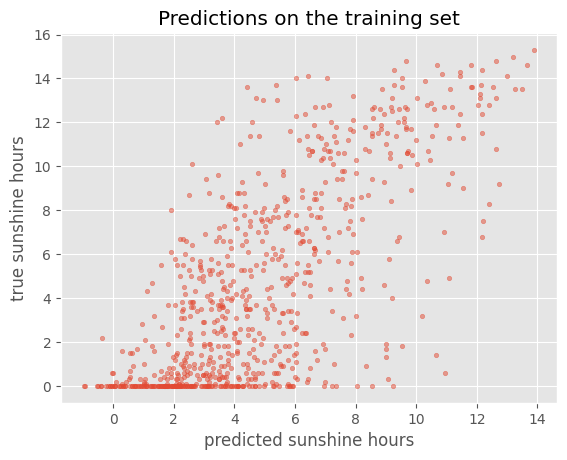

In [14]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

def plot_predictions(y_pred, y_true, title):
  plt.style.use('ggplot')
  plt.scatter(y_pred, y_true, s=10, alpha=0.5)
  plt.xlabel("predicted sunshine hours")
  plt.ylabel("true sunshine hours")
  plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

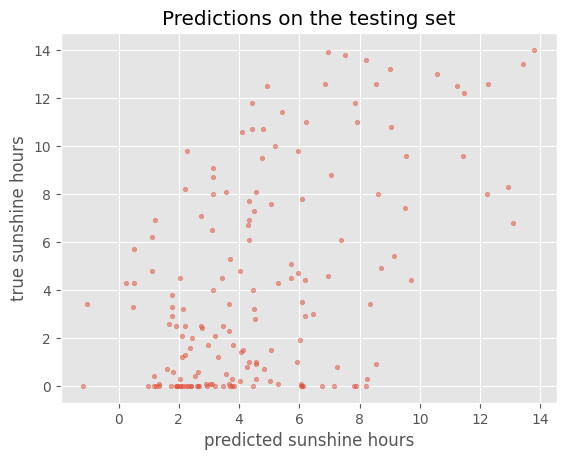

In [15]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the testing set')

In [16]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)

6/6 [==============================] - 0s 3ms/step - loss: 14.1457 - root_mean_squared_error: 3.7611


In [17]:
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(
    train_metrics['root_mean_squared_error'],
    test_metrics['root_mean_squared_error']))

Train RMSE: 3.13, Test RMSE: 3.76


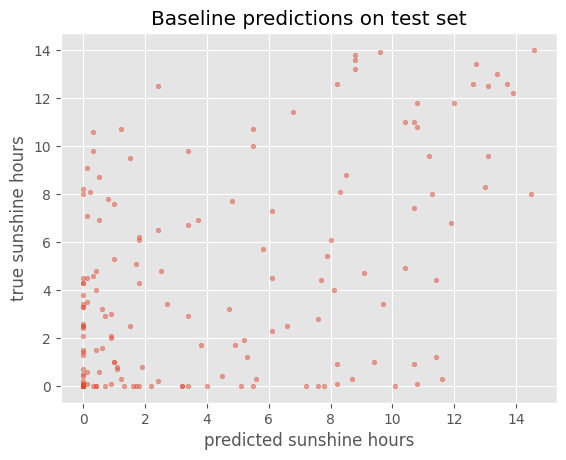

In [18]:
# How to mitigate overfitting? Use BASEL sunshine as a baseline constraint for model predictions
y_baseline_prediction = X_test['BASEL_sunshine']
plot_predictions(y_baseline_prediction, y_test,
                 'Baseline predictions on test set')

In [19]:
from sklearn.metrics import mean_squared_error
from keras.metrics import RootMeanSquaredError

rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)
rmse_keras = RootMeanSquaredError()
rmse_keras.update_state(y_test, y_baseline_prediction)

print('SKLearn RMSE baseline:', rmse_baseline)
print('Keras RMSE baseline:', rmse_keras.result().numpy())
print('NN RMSE score:', test_metrics['root_mean_squared_error'])

SKLearn RMSE baseline: 4.351217175583277
Keras RMSE baseline: 4.351217
NN RMSE score: 3.7610719203948975


In [20]:
# Why do we need validation dataset?
history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_data = (X_val, y_val), verbose = 0)

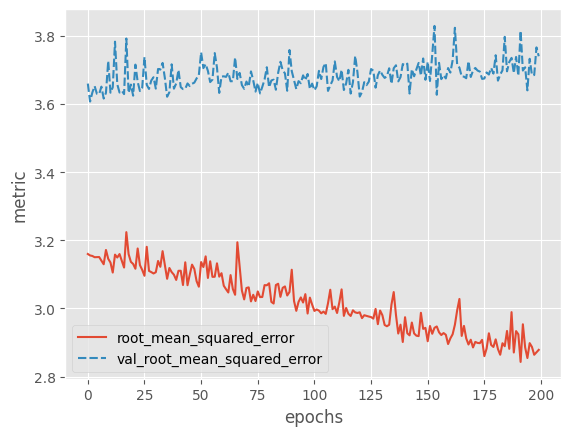

In [21]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

**Tuning hyperparameters (HP) to improve model performance**

Things to consider:
- Batch normalisation
- Training data: only retain relevant features
- Early stopping

In [22]:
model = create_nn()
compile_model(model)

from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, y_train, batch_size=32, epochs=1000,
                    validation_data=(X_val, y_val), callbacks=[earlystopper])

Epoch 1/1000
24/24 [==============================] - 1s 11ms/step - loss: 20.1974 - root_mean_squared_error: 4.4942 - val_loss: 14.2479 - val_root_mean_squared_error: 3.7746
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 13.9696 - root_mean_squared_error: 3.7376 - val_loss: 13.8825 - val_root_mean_squared_error: 3.7259
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 13.5197 - root_mean_squared_error: 3.6769 - val_loss: 13.7365 - val_root_mean_squared_error: 3.7063
Epoch 4/1000
24/24 [==============================] - 0s 6ms/step - loss: 13.4488 - root_mean_squared_error: 3.6673 - val_loss: 13.6347 - val_root_mean_squared_error: 3.6925
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 13.4450 - root_mean_squared_error: 3.6667 - val_loss: 13.5039 - val_root_mean_squared_error: 3.6748
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 13.1114 - root_mean_squared_error: 3.6210 - val_loss: 1

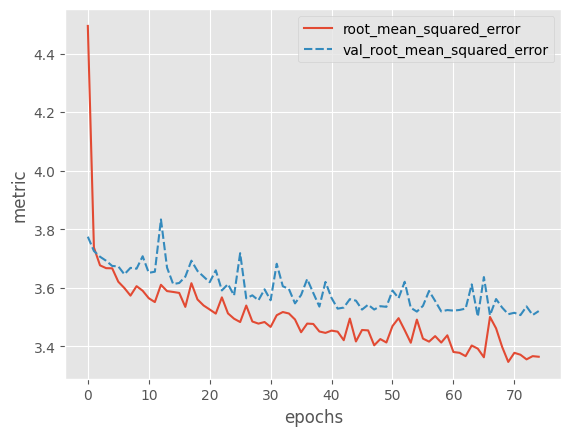

In [23]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

In [24]:
def create_batch_norm_nn():

  # Input layer
  inputs = keras.layers.Input(shape=X_data.shape[1])

  # Dense layers
  layers_batchnorm = keras.layers.BatchNormalization()(inputs)
  layers_dense1 = keras.layers.Dense(100, 'relu')(layers_batchnorm)
  layers_dense2 = keras.layers.Dense(50, 'relu')(layers_dense1)

  # Output layer
  outputs = keras.layers.Dense(1)(layers_dense2)

  # Construct model
  model = keras.Model(inputs=inputs, outputs=outputs, name='NN_batchNorm')

  return model

# Define model
model = create_batch_norm_nn()

# Compile model
compile_model(model)

# View summary of model
model.summary()

Model: "NN_batchNorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9)]               0         
                                                                 
 batch_normalization (Batch  (None, 9)                 36        
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None, 100)               1000      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6137 (23.97 KB)
Trainable params: 6119 (23.90 KB)
Non-trainable params: 18 (72.00 Byte)
__________________

In [25]:
earlystopper = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, y_train, batch_size=32, epochs=1000,
                    validation_data=(X_val, y_val), callbacks=[earlystopper])

Epoch 1/1000
24/24 [==============================] - 1s 11ms/step - loss: 32.2598 - root_mean_squared_error: 5.6798 - val_loss: 18.1401 - val_root_mean_squared_error: 4.2591
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 18.0329 - root_mean_squared_error: 4.2465 - val_loss: 40.1050 - val_root_mean_squared_error: 6.3329
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 14.5646 - root_mean_squared_error: 3.8164 - val_loss: 23.6556 - val_root_mean_squared_error: 4.8637
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 13.5699 - root_mean_squared_error: 3.6837 - val_loss: 17.2434 - val_root_mean_squared_error: 4.1525
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 14.2276 - root_mean_squared_error: 3.7719 - val_loss: 15.0680 - val_root_mean_squared_error: 3.8817
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 13.1425 - root_mean_squared_error: 3.6253 - val_loss: 1

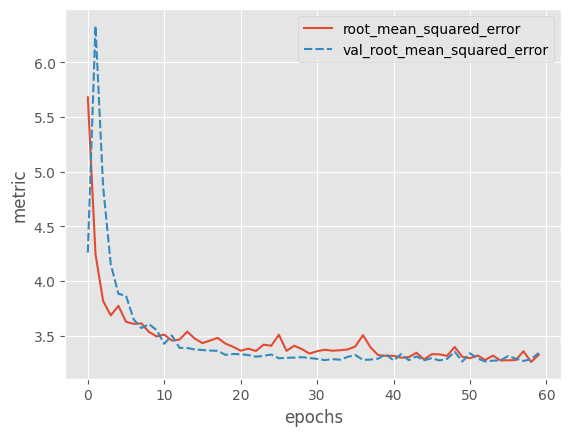

In [26]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

In [27]:
# View test set predictions and its relevant metrics
y_test_predicted = model.predict(X_test)
rmse_opt = mean_squared_error(y_test, y_test_predicted, squared=False)
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)

print("Optimised NN:", rmse_opt)
print("Baseline NN:", rmse_baseline)

6/6 [==============================] - 0s 2ms/step
Optimised NN: 3.3591479505683832
Baseline NN: 4.351217175583277


# Comparing RandomForest (ML) with Neural Networks (2 layer MLP)

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_leaf=1)

# Train RF
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)

# Evaluate RF metrics
rmse_forest = mean_squared_error(y_test, forest_preds, squared=False)
print("RF RMSE: ", rmse_forest)

RF RMSE:  3.3342726468899477


Random Forest in this case, needed two minutes to set up and train. Much faster than DL. It performs much better than NN even after NN was optimised. Some tasks (i.e. regression) are great with ML, DL is not great at everything.